<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Pivot and Melt Introduction

___
<br>

This lesson is all about **transforming data** using `pandas`. Data transformation is the reorganization of your data set's rows and columns into a different, potentially **more useful shape and format**. 

The benefits of transforming your data include **better access to relevant information** and **streamlined data manipulation**. As you become more familiar with data sets and their associated operations, you will develop an intuition and appreciation for when it's better to **work row-wise or column-wise**.

Different data formats are better for different tasks. It takes time and experience to learn the distinctions. But, for now, we'll introduce the **common structures, transformations, and how to apply these transformations**.

### Learning Objectives
- Understand the differences between **long and wide format data**.
- Understand **pivot tables**.
- Practice transforming data between **long and wide** formats.
- Practice creating pivot tables.
- Learn how to avoid **common pitfalls and obstacles** in data transformation with `pandas`.

### Lesson Guide

- [Wide Format Data](#wide_format)
- [Melting Wide Format to Long Format](#melt_data)
- [Pivot Long Format to Wide Format](#pivot_data)
- [MultiIndex/Hierarchical Indices in `pandas`](#multiindex)
- [Summarizing Data With `.pivot_table()` and Aggregate  Functions](#pivot_table_summarizing)
- [Getting Rid of the MultiIndex: "Flattening" Data](#multiindex_to_flat)


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


<a id='wide_format'></a>

### Wide Format Data

---

Between "wide" and "long," **wide format data is the more intuitive**. It's also a common format for `.csv` files. You've already viewed multiple data sets in wide format throughout this course.

Wide format data is structured so that:

- Unique IDs, subjects, observations, etc. are represented as **rows**.
- Distinct information categories (**variables**) are represented as columns. In other words, there is a **column for every "variable"** with its own unique values.
- This format can often be a more compact matrix, particularly if little or no information is missing.
- It is **not as useful for SQL-style operations**: It can make it much harder or even impossible to **join tables together on a value**.
- It can be useful in `pandas` when you need to perform operations on variables **across columns**; for example, multiplying columns together to create a new column.
- It is the data format required for statistical modeling (with few exceptions).

Here is a simple example of wide data, where each row represents one student's scores in different subjects.

In [2]:
df_wide = pd.read_csv('datasets/students_wide.csv')
df_wide


,Student ID,Mathematics,English,History,Geography,Physics,Chemistry,Biology
0,1,75,85,69,82.0,NaN,NaN,NaN
1,2,66,90,74,56.0,NaN,NaN,NaN
2,3,78,75,82,NaN,80.0,75.0,86.0
3,4,66,87,94,NaN,68.0,82.0,54.0
4,5,72,79,84,NaN,75.0,66.0,60.0


How might you want to analyse the data in the DataFrame above? What would you need to do?

<a id='melt_data'></a>

### Melting Wide to Long

The `pandas` `melt()` function can be used to transform a wide format dataframe into a long format, where a new column `variable` represents the column and the `value` is the value stored in that column for a particular unique ID.

In [7]:
# Melt the df_wide dataframe into long format by each student_ID
df_long1 = pd.melt(df_wide, id_vars=['Student ID'])
df_long1

,Student ID,variable,value
0,1,Mathematics,75.0
1,2,Mathematics,66.0
2,3,Mathematics,78.0
3,4,Mathematics,66.0
4,5,Mathematics,72.0
5,1,English,85.0
6,2,English,90.0
7,3,English,75.0
8,4,English,87.0
9,5,English,79.0


In [8]:
# Change the column headers to represent the original meaning
df_long1 = pd.melt(df_wide, id_vars='Student ID', var_name='Subject', value_name = 'Score')
df_long1

,Student ID,Subject,Score
0,1,Mathematics,75.0
1,2,Mathematics,66.0
2,3,Mathematics,78.0
3,4,Mathematics,66.0
4,5,Mathematics,72.0
5,1,English,85.0
6,2,English,90.0
7,3,English,75.0
8,4,English,87.0
9,5,English,79.0


### Using `melt` on DataFrame directly

We can also call the `melt` method on the DataFrame, and specify the column names to use for the variable and value respectively:

In [9]:
# Using melt method on df_wide
df_long2 = df_wide.melt(id_vars='Student ID', var_name='Subject', value_name = 'Score')
df_long2

,Student ID,Subject,Score
0,1,Mathematics,75.0
1,2,Mathematics,66.0
2,3,Mathematics,78.0
3,4,Mathematics,66.0
4,5,Mathematics,72.0
5,1,English,85.0
6,2,English,90.0
7,3,English,75.0
8,4,English,87.0
9,5,English,79.0


## Specifying identifying rows

We can specify which columns are to be the identifiers. Let's say we add another column to represent the student's major.

In [10]:
df_wide['Major']=pd.Series(['Arts','Arts','Science','Science','Science'])
df_wide

,Student ID,Mathematics,English,History,Geography,Physics,Chemistry,Biology,Major
0,1,75,85,69,82.0,NaN,NaN,NaN,Arts
1,2,66,90,74,56.0,NaN,NaN,NaN,Arts
2,3,78,75,82,NaN,80.0,75.0,86.0,Science
3,4,66,87,94,NaN,68.0,82.0,54.0,Science
4,5,72,79,84,NaN,75.0,66.0,60.0,Science


Now we can include `Major` as an identifier variable along with the `Student ID`, for the variable `Subject` with value `Score`

In [11]:
df_long3=df_wide.melt(id_vars=['Student ID','Major'], var_name='Subject', value_name='Score')
df_long3

,Student ID,Major,Subject,Score
0,1,Arts,Mathematics,75.0
1,2,Arts,Mathematics,66.0
2,3,Science,Mathematics,78.0
3,4,Science,Mathematics,66.0
4,5,Science,Mathematics,72.0
5,1,Arts,English,85.0
6,2,Arts,English,90.0
7,3,Science,English,75.0
8,4,Science,English,87.0
9,5,Science,English,79.0


## Missing values

In all the above we have many `NaN` values because the values were missing in the original wide format. In this case we can just drop the nulls, as they are not necessary in the long format. 


In [12]:
df_long3.dropna(inplace=True)
df_long3

,Student ID,Major,Subject,Score
0,1,Arts,Mathematics,75.0
1,2,Arts,Mathematics,66.0
2,3,Science,Mathematics,78.0
3,4,Science,Mathematics,66.0
4,5,Science,Mathematics,72.0
5,1,Arts,English,85.0
6,2,Arts,English,90.0
7,3,Science,English,75.0
8,4,Science,English,87.0
9,5,Science,English,79.0


### Save the long format data

Now that the data is in long format, we can save it.



In [25]:
df_long3.to_csv('datasets/df_long.csv', index=False)

<AxesSubplot:xlabel='Subject'>

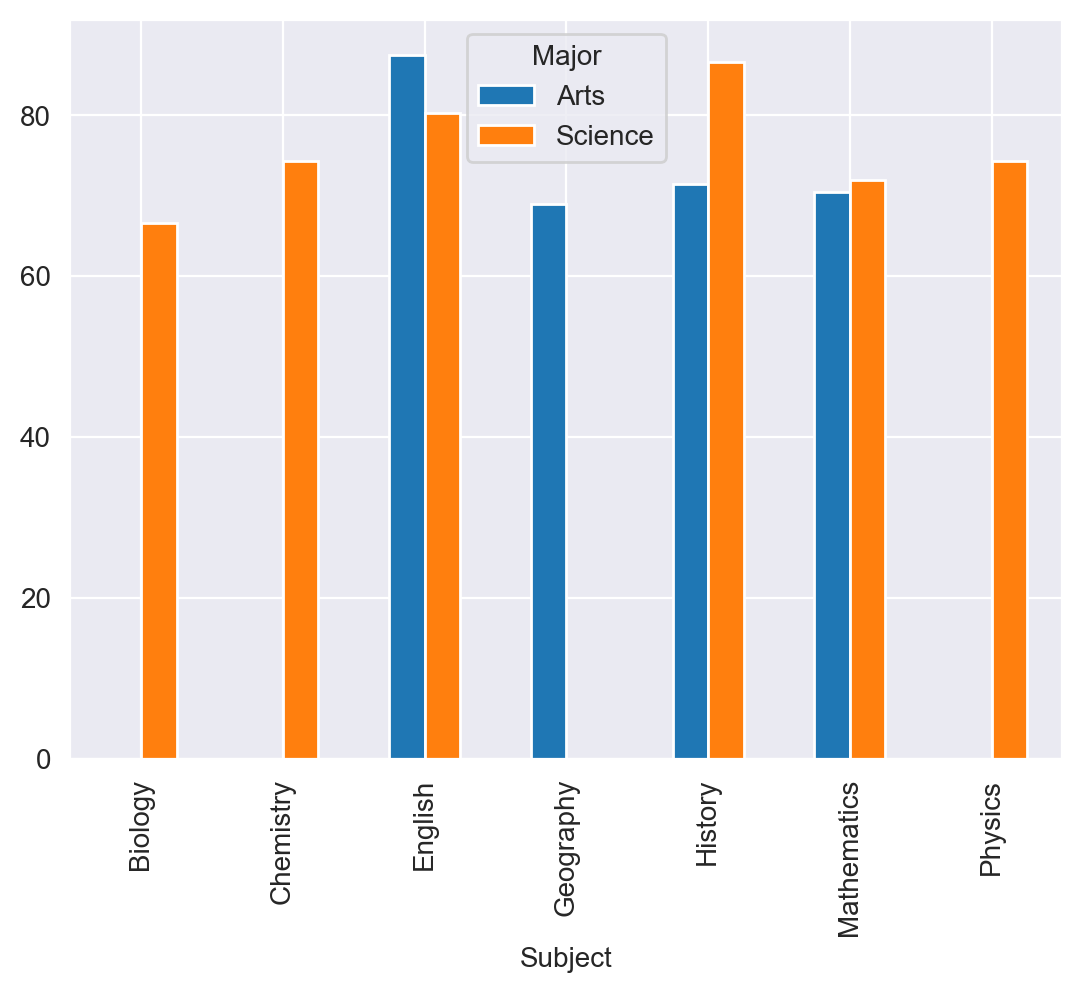

In [22]:
df_long3.groupby(['Subject','Major'])['Score'].mean().unstack().plot(kind='bar')

<a id='pivot_data'></a>

## Pivot to Transform from Long to Wide

The `pivot` function is used to transform from long to wide format. 
Let's use the file that we have saved from above.


In [26]:
df_long = pd.read_csv('datasets/df_long.csv')

In [27]:
df_long

,Student ID,Major,Subject,Score
0,1,Arts,Mathematics,75.0
1,2,Arts,Mathematics,66.0
2,3,Science,Mathematics,78.0
3,4,Science,Mathematics,66.0
4,5,Science,Mathematics,72.0
5,1,Arts,English,85.0
6,2,Arts,English,90.0
7,3,Science,English,75.0
8,4,Science,English,87.0
9,5,Science,English,79.0


In [29]:
df_wide1 = pd.pivot(df_long, index=['Student ID','Major'], columns='Subject', values='Score')
df_wide1

,Subject,Biology,Chemistry,English,Geography,History,Mathematics,Physics
Student ID,Major,,,,,,,
1,Arts,NaN,NaN,85.0,82.0,69.0,75.0,NaN
2,Arts,NaN,NaN,90.0,56.0,74.0,66.0,NaN
3,Science,86.0,75.0,75.0,NaN,82.0,78.0,80.0
4,Science,54.0,82.0,87.0,NaN,94.0,66.0,68.0
5,Science,60.0,66.0,79.0,NaN,84.0,72.0,75.0


<a id='multiindex'></a>


### MultiIndex 
In the header, you can see that the format of the new wide data **is *not* the same as our originally loaded wide format**. `pandas` implements something called **MultiIndexing** or **hierarchical indexing**, which allows for "tiered" row and column labels.

The main difference is that we now have a `variable` name in the top left corner, which is **"labeling"** our columns (and corresponds to the name of our original column in the long format data). The row indexer has become our **single key/ID variable**, `Student ID` and `Major`. The columns are what we would expect here: **Each one is a variable**, like in the original wide format data.

We can reset the index to the default row numbering starting from 0, which will set the `Student ID` and `Major` as  columns again.

In [30]:
df_wide1 = df_wide1.reset_index()
df_wide1

Subject,Student ID,Major,Biology,Chemistry,English,Geography,History,Mathematics,Physics
0,1,Arts,NaN,NaN,85.0,82.0,69.0,75.0,NaN
1,2,Arts,NaN,NaN,90.0,56.0,74.0,66.0,NaN
2,3,Science,86.0,75.0,75.0,NaN,82.0,78.0,80.0
3,4,Science,54.0,82.0,87.0,NaN,94.0,66.0,68.0
4,5,Science,60.0,66.0,79.0,NaN,84.0,72.0,75.0


The variable name `Subject` is now used to name the columns, as we can see if we list all the columns of the DataFrame.

In [33]:
df_wide1.columns

Index(['Student ID', 'Major', 'Biology', 'Chemistry', 'English', 'Geography',
       'History', 'Mathematics', 'Physics'],
      dtype='object')

We can reset the name to `None` and this will put make the format what we are used to.

In [32]:
df_wide1.columns.name=None
df_wide1

,Student ID,Major,Biology,Chemistry,English,Geography,History,Mathematics,Physics
0,1,Arts,NaN,NaN,85.0,82.0,69.0,75.0,NaN
1,2,Arts,NaN,NaN,90.0,56.0,74.0,66.0,NaN
2,3,Science,86.0,75.0,75.0,NaN,82.0,78.0,80.0
3,4,Science,54.0,82.0,87.0,NaN,94.0,66.0,68.0
4,5,Science,60.0,66.0,79.0,NaN,84.0,72.0,75.0


### Using pivot() with the DataFrame

We can also use the `pivot()` method with the DataFrame. Let's reset the index in the same step, and set the column name to `None` too. 

In [37]:
df_wide2 = df_long3.pivot(index=['Student ID','Major'], columns='Subject', values='Score').reset_index()
df_wide2.columns.name=None

In [38]:
df_wide2

,Student ID,Major,Biology,Chemistry,English,Geography,History,Mathematics,Physics
0,1,Arts,NaN,NaN,85.0,82.0,69.0,75.0,NaN
1,2,Arts,NaN,NaN,90.0,56.0,74.0,66.0,NaN
2,3,Science,86.0,75.0,75.0,NaN,82.0,78.0,80.0
3,4,Science,54.0,82.0,87.0,NaN,94.0,66.0,68.0
4,5,Science,60.0,66.0,79.0,NaN,84.0,72.0,75.0


<a id='pivot_table_summarizing'></a>

### Summarizing Your Data With  `.pivot_table()` and Aggregate Functions

---
We have used `pivot` to transform long format data to wide format. A related function `pivot_table()` can also perform the same transformation, but you can also summarize the values using an aggregate function such as finding the mean, count, sum, just like Excel pivot tables. 

Below, I am calling the `.pivot_table()` function with:

- The long format data as the first argument.
- `Subject` specified as the columns that indicate the variable names (groups).
- `Score` specified as the column that contains the data per variable.
- `Major` as the index; the rows will be grouped by `Major`.
- `np.mean`, `np.median`, `np.std`, and `len` as aggregate functions. These will be calculated for each `Major-by-Variable` group.
- A `fill_value` of `np.nan` for cells in the output table that have no data.

In [41]:
df_wide_pv = pd.pivot_table(df_long, columns=['Subject'], values='Score',
                                     index=['Major'], aggfunc=[np.mean, np.median, np.std, len],
                                     fill_value=np.nan)
df_wide_pv

mean                                                         \
Subject    Biology  Chemistry    English Geography    History Mathematics   
Major                                                                       
Arts           NaN        NaN  87.500000      69.0  71.500000        70.5   
Science  66.666667  74.333333  80.333333       NaN  86.666667        72.0   

                    median                                                  \
Subject    Physics Biology Chemistry English Geography History Mathematics   
Major                                                                        
Arts           NaN     NaN       NaN    87.5      69.0    71.5        70.5   
Science  74.333333    60.0      75.0    79.0       NaN    84.0        72.0   

                       std                                           \
Subject Physics    Biology Chemistry   English  Geography   History   
Major                                                                 
Arts        NaN        NaN       NaN  3.535534  18.384776  3.535534   
Science    75.0  17.009801  8.020806  6.110101        NaN  6.429101   

                                  len                                      \
Subject Mathematics   Physics Biology Chemistry English Geography History   
Major                                                                       
Arts       6.363961       NaN     NaN       NaN       2       2.0       2   
Science    6.000000  6.027714     3.0       3.0       3       NaN       3   

                             
Subject Mathematics Physics  
Major                        
Arts              2     NaN  
Science           3     3.0

The output DataFrame gives you a "hierarchical" column index — the three variables for each aggregate function. The row index is the `major` groups.

If you apply more index variables, the row indices will also become hierarchical! However, this can quickly make for a bloated DataFrame.

In [42]:
df_wide_pv.columns

MultiIndex([(  'mean',     'Biology'),
            (  'mean',   'Chemistry'),
            (  'mean',     'English'),
            (  'mean',   'Geography'),
            (  'mean',     'History'),
            (  'mean', 'Mathematics'),
            (  'mean',     'Physics'),
            ('median',     'Biology'),
            ('median',   'Chemistry'),
            ('median',     'English'),
            ('median',   'Geography'),
            ('median',     'History'),
            ('median', 'Mathematics'),
            ('median',     'Physics'),
            (   'std',     'Biology'),
            (   'std',   'Chemistry'),
            (   'std',     'English'),
            (   'std',   'Geography'),
            (   'std',     'History'),
            (   'std', 'Mathematics'),
            (   'std',     'Physics'),
            (   'len',     'Biology'),
            (   'len',   'Chemistry'),
            (   'len',     'English'),
            (   'len',   'Geography'),
            (   'len',   

<a id='multiindex_to_flat'></a>

### Getting Rid of the MultiIndex: "Flattening" Data

---

The most reliable way to "flatten" a MultiIndexed DataFrame is with the `.to_records()` function. To make this a new DataFrame, it needs to be wrapped in a `pd.DataFrame()` like so:

In [43]:
results_summary = pd.DataFrame(df_wide_pv.to_records())
results_summary.head(2)

,Major,"('mean', 'Biology')","('mean', 'Chemistry')","('mean', 'English')","('mean', 'Geography')","('mean', 'History')","('mean', 'Mathematics')","('mean', 'Physics')","('median', 'Biology')","('median', 'Chemistry')","('median', 'English')","('median', 'Geography')","('median', 'History')","('median', 'Mathematics')","('median', 'Physics')","('std', 'Biology')","('std', 'Chemistry')","('std', 'English')","('std', 'Geography')","('std', 'History')","('std', 'Mathematics')","('std', 'Physics')","('len', 'Biology')","('len', 'Chemistry')","('len', 'English')","('len', 'Geography')","('len', 'History')","('len', 'Mathematics')","('len', 'Physics')"
0,Arts,NaN,NaN,87.500000,69.0,71.500000,70.5,NaN,NaN,NaN,87.5,69.0,71.5,70.5,NaN,NaN,NaN,3.535534,18.384776,3.535534,6.363961,NaN,NaN,NaN,2,2.0,2,2,NaN
1,Science,66.666667,74.333333,80.333333,NaN,86.666667,72.0,74.333333,60.0,75.0,79.0,NaN,84.0,72.0,75.0,17.009801,8.020806,6.110101,NaN,6.429101,6.000000,6.027714,3.0,3.0,3,NaN,3,3,3.0


You can see that the new column names are tuples of the hierarchy of MultiIndexed columns. For example, you could convert these to new, more easily indexed columns with something like a list comprehension.

We can use the `join()` and `.eval()` functions to combine the tuple as a single String, for example:


In [47]:
eval("('mean','Biology')")

('mean', 'Biology')

In [51]:
'_'.join(eval("('mean','Biology')"))

'mean_Biology'

**Use a list comprehension and the `eval()` and `join()` functions to convert the flattened MultiIndexed columns to something more readable.**

In [49]:
results_summary.columns

Index(['Major', '('mean', 'Biology')', '('mean', 'Chemistry')',
       '('mean', 'English')', '('mean', 'Geography')', '('mean', 'History')',
       '('mean', 'Mathematics')', '('mean', 'Physics')',
       '('median', 'Biology')', '('median', 'Chemistry')',
       '('median', 'English')', '('median', 'Geography')',
       '('median', 'History')', '('median', 'Mathematics')',
       '('median', 'Physics')', '('std', 'Biology')', '('std', 'Chemistry')',
       '('std', 'English')', '('std', 'Geography')', '('std', 'History')',
       '('std', 'Mathematics')', '('std', 'Physics')', '('len', 'Biology')',
       '('len', 'Chemistry')', '('len', 'English')', '('len', 'Geography')',
       '('len', 'History')', '('len', 'Mathematics')', '('len', 'Physics')'],
      dtype='object')

In [52]:
results_summary.columns = ['_'.join(eval(c)) if c[0]=='(' else c for c in results_summary.columns]

In [53]:
results_summary

,Major,mean_Biology,mean_Chemistry,mean_English,mean_Geography,mean_History,mean_Mathematics,mean_Physics,median_Biology,median_Chemistry,median_English,median_Geography,median_History,median_Mathematics,median_Physics,std_Biology,std_Chemistry,std_English,std_Geography,std_History,std_Mathematics,std_Physics,len_Biology,len_Chemistry,len_English,len_Geography,len_History,len_Mathematics,len_Physics
0,Arts,NaN,NaN,87.500000,69.0,71.500000,70.5,NaN,NaN,NaN,87.5,69.0,71.5,70.5,NaN,NaN,NaN,3.535534,18.384776,3.535534,6.363961,NaN,NaN,NaN,2,2.0,2,2,NaN
1,Science,66.666667,74.333333,80.333333,NaN,86.666667,72.0,74.333333,60.0,75.0,79.0,NaN,84.0,72.0,75.0,17.009801,8.020806,6.110101,NaN,6.429101,6.000000,6.027714,3.0,3.0,3,NaN,3,3,3.0
